# Currency Foreign Exchange Rates

## 1.1 了解相关数据
包含了一个文件：forex.csv
有 7 个列，分别是:
- slug: A货币/B货币的形式，表示兑换的两种货币
- data: 表示汇率的日期
- open：开盘价格
- high: 最高价格
- low: 最低价格
- close: 闭盘价格
- currency: 基准货币

In [1]:
import numpy as np
import pandas as pd

forex_file = 'forex.csv'
data = pd.read_csv(forex_file)

print(f'数据共有{len(data)}行')
print("\n数据示例:")
print(data.iloc[:5])  # 打印前5行数据
print()

columns = data.columns.tolist()
for column in columns:
    print(f'{column}的数据类型为: {type(data.loc[0,column])}')

数据共有1453035行

数据示例:
      slug        date     open    high     low   close currency
0  GBP/EGP  2001-04-10  5.58090  5.5947  5.5947  5.5947      EGP
1  GBP/EGP  2001-06-04  5.47517  5.4939  5.4939  5.4939      EGP
2  GBP/EGP  2001-08-01  5.67990  5.6543  5.6543  5.6543      EGP
3  GBP/EGP  2002-07-29  7.21700  7.2170  7.2170  7.2170      EGP
4  GBP/EGP  2003-01-02  7.42429  7.3899  7.3899  7.3899      EGP

slug的数据类型为: <class 'str'>
date的数据类型为: <class 'str'>
open的数据类型为: <class 'numpy.float64'>
high的数据类型为: <class 'numpy.float64'>
low的数据类型为: <class 'numpy.float64'>
close的数据类型为: <class 'numpy.float64'>
currency的数据类型为: <class 'str'>


In [2]:
currency_convert_types = list(set(data['slug']))
currency_types = set()
for line in data['slug']:
    currency_types.add(line.split('/')[0])
    currency_types.add(line.split('/')[1])
currency_types = list(currency_types)

print(f'包含了{len(currency_convert_types)}种货币的兑换关系, 涉及到{len(currency_types)}种货币')

# 计算统计的日期跨度
date_list = list(set(data['date']))
date_list.sort()
year_month = list(set('-'.join(date.split('-')[:-1]) for date in date_list))
year_month.sort()
print(f'统计开始时间: {date_list[0]}, 统计结束时间: {date_list[-1]}, 总共有{len(date_list)}天')

包含了340种货币的兑换关系, 涉及到113种货币
统计开始时间: 1996-10-30, 统计结束时间: 2021-08-30, 总共有6445天


In [3]:
# 查看是否有缺失值
import math

for column in columns:
    column_empty_cnt = 0
    for elem in data[column]:
        if isinstance(elem, str):
            if len(elem) == 0:
                column_empty_cnt += 1
        elif isinstance(elem, float):
            if math.isnan(elem):
                column_empty_cnt += 1
        else:
            print(type(elem))
            break
    print(f'{column}空缺值数量为: {column_empty_cnt}')

slug空缺值数量为: 0
date空缺值数量为: 0
open空缺值数量为: 0
high空缺值数量为: 0
low空缺值数量为: 0
close空缺值数量为: 0
currency空缺值数量为: 0


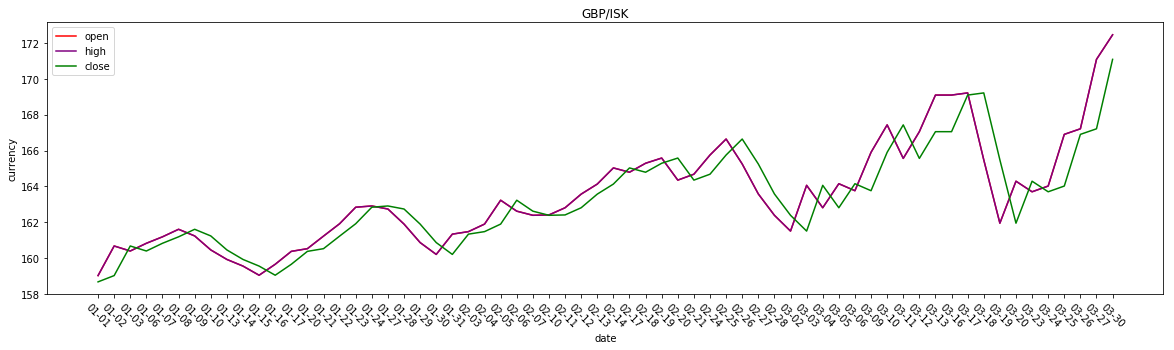

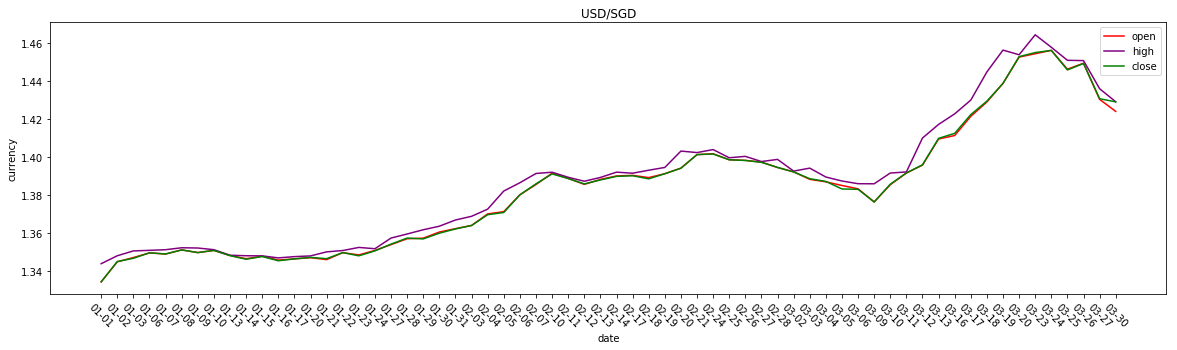

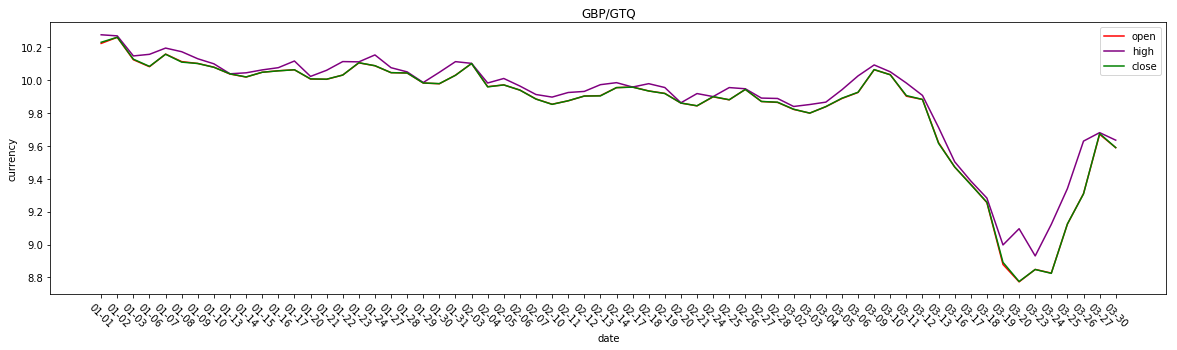

In [24]:
# 画5种货币的汇率变动
import matplotlib.pyplot as plt
import datetime

def date_later(d1, d2):
    return datetime.datetime.strptime(d1, '%Y-%m-%d') >= datetime.datetime.strptime(d2, '%Y-%m-%d')

def currency_vis(currency_convert_type, date_begin, date_end):
    x, y1, y2, y3 = [], [], [], []
    for a, b, c, d, e in zip(data['date'], data['slug'], data['open'], data['high'], data['close']):  # 选择两个月的数据进行可视化
        if b == currency_convert_type:
            if date_later(a, date_begin) and date_later(date_end, a):
                x.append(a[5:])
                y1.append(c)
                y2.append(d)
                y3.append(e)

    fig, ax = plt.subplots(figsize=(20,5))
    ax.plot(x, y1, c='red', label='open')
    ax.plot(x, y2, c='purple', label='high')
    ax.plot(x, y3, c='green', label='close')
    ax.set_title(currency_convert_type)
    ax.set_xlabel('date')
    ax.set_ylabel('currency')
    plt.xticks(rotation=-45)
    plt.legend()
    plt.show()

for currency_convert_type in currency_convert_types[:3]:
    currency_vis(currency_convert_type, '2020-01-01', '2020-03-30')

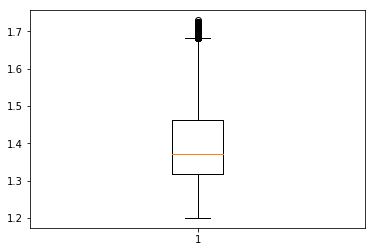

In [27]:
# 利用盒图找到离群点
currency_convert_type = 'USD/SGD'

y = []

for a, b in zip(data['slug'], data['open']):
    if a == currency_convert_type:
        y.append(b)
y = np.array(y)
mn = y.min()
mx = y.max()
Q3 = np.percentile(y, 75)
Q1 = np.percentile(y, 25)
media = np.percentile(y, 50)
print(f'mn: {mn}, Q1: {Q1}, media: {media}, Q3: {Q3}, mx: {mx}')
plt.boxplot(y)
plt.show()